# 1. Gamma manipulations

## 1.1

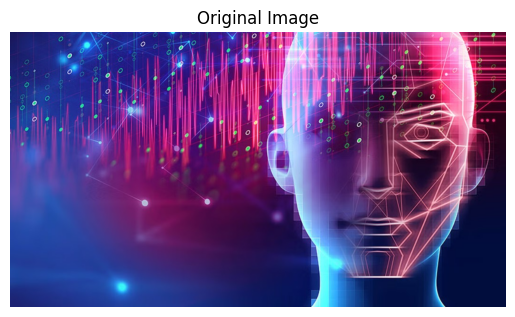

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

original_image_path = './images/img.jpg' 
saved_image_path = './images/my_image.tif'

image = Image.open(original_image_path)
image.save(saved_image_path)
image = Image.open(saved_image_path)

plt.figure()
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.show()


## 1.2

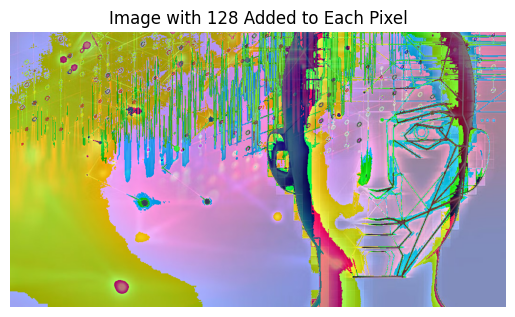

In [2]:
cc = np.array(image)
c1 = cc + 128

modified_image_c1 = Image.fromarray(c1.astype(np.uint8))

plt.figure()
plt.imshow(modified_image_c1)
plt.title('Image with 128 Added to Each Pixel')
plt.axis('off')

plt.show()


## 1.3

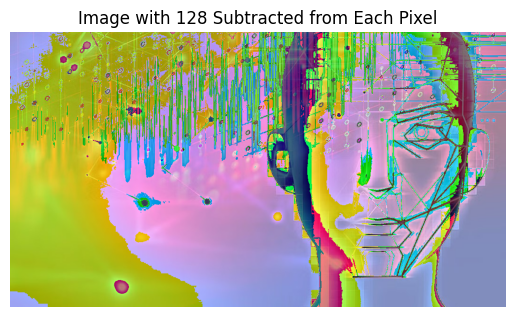

In [3]:
c2 = cc - 128

modified_image_c2 = Image.fromarray(c2.astype(np.uint8))

plt.figure()
plt.imshow(modified_image_c2)
plt.title('Image with 128 Subtracted from Each Pixel')

plt.axis('off')
plt.show()

## 1.4

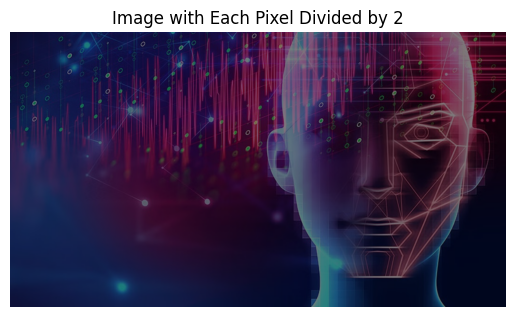

In [4]:
c3 = cc / 2

modified_image_c3 = Image.fromarray(c3.astype(np.uint8))

plt.figure()
plt.imshow(modified_image_c3)
plt.title('Image with Each Pixel Divided by 2')
plt.axis('off')
plt.show()


## 1.5

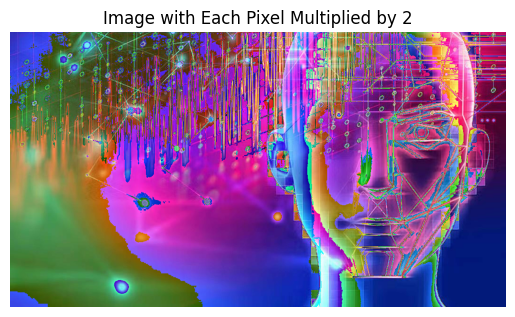

In [5]:
c4 = cc * 2

modified_image_c4 = Image.fromarray(c4.astype(np.uint8))

plt.figure()
plt.imshow(modified_image_c4)
plt.title('Image with Each Pixel Multiplied by 2')
plt.axis('off')
plt.show()

## 1.6

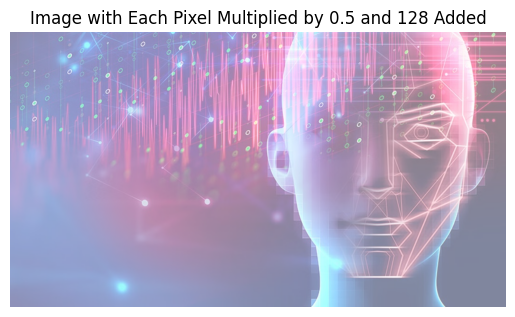

In [6]:
c5 = cc * 0.5 + 128

modified_image_c4 = Image.fromarray(c5.astype(np.uint8))

plt.figure()
plt.imshow(modified_image_c4)
plt.title('Image with Each Pixel Multiplied by 0.5 and 128 Added')
plt.axis('off')
plt.show()

## 2.1

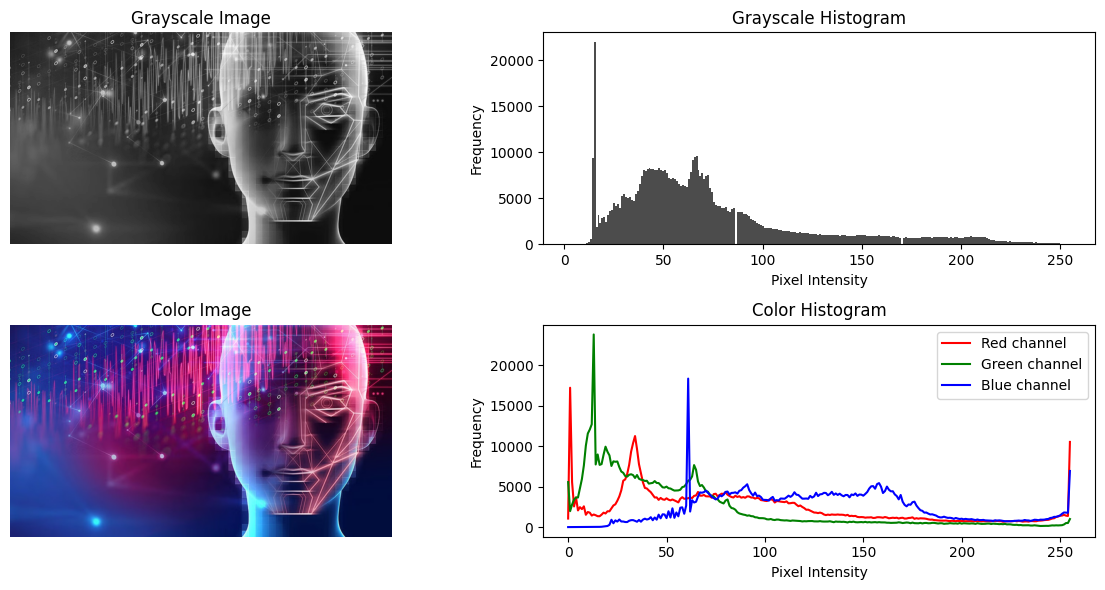

In [7]:
gray_image = image.convert('L')
cc_gray = np.array(gray_image)
# Display the grayscale image and its histogram
plt.figure(figsize=(12, 6))

# Grayscale Image and its histogram
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(cc_gray.ravel(), bins=256, color='k', alpha=0.7)
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Color Image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(image)
plt.title('Color Image')
plt.axis('off')

plt.subplot(2, 2, 4)
R = np.histogram(cc[:,:,0], bins=256, range=[0,256])[0]
G = np.histogram(cc[:,:,1], bins=256, range=[0,256])[0]
B = np.histogram(cc[:,:,2], bins=256, range=[0,256])[0]
plt.plot(R, color='r')
plt.plot(G, color='g')
plt.plot(B, color='b')
plt.title('Color Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(['Red channel', 'Green channel', 'Blue channel'])

plt.tight_layout()
plt.show()

## 2.2

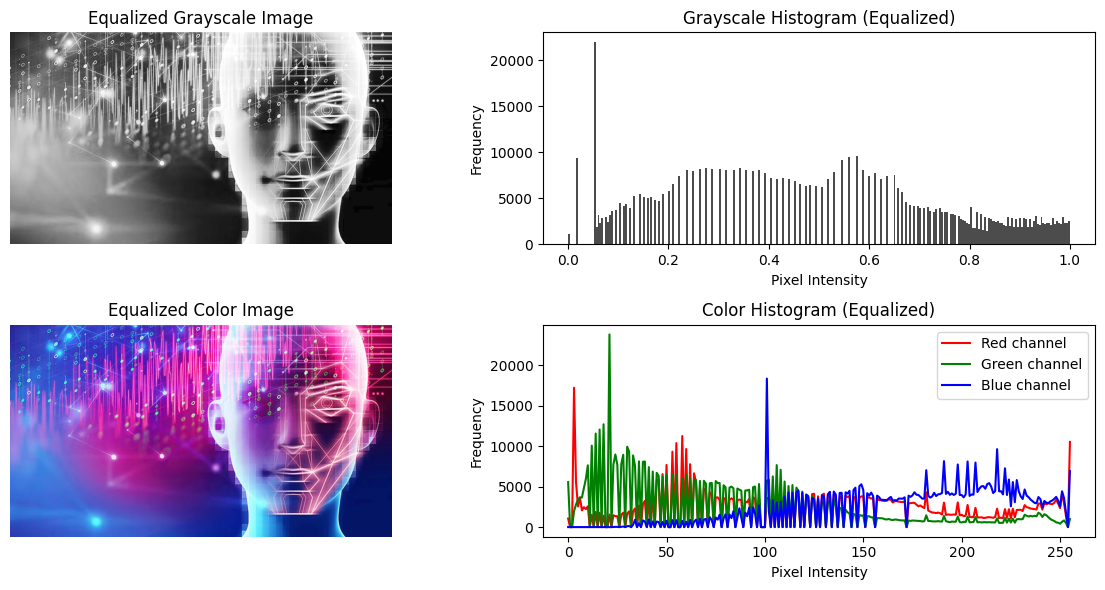

In [13]:
from skimage import exposure

# Perform histogram equalization for grayscale image
h_gray = exposure.equalize_hist(cc_gray)

# Perform histogram equalization for color image
I2 = exposure.equalize_hist(cc)

# Display the equalized grayscale image and its histogram
plt.figure(figsize=(12, 6))

# Equalized grayscale image
plt.subplot(2, 2, 1)
plt.imshow(h_gray, cmap='gray')
plt.title('Equalized Grayscale Image')
plt.axis('off')

# Grayscale histogram after equalization
plt.subplot(2, 2, 2)
plt.hist(h_gray.ravel(), bins=256, color='k', alpha=0.7)
plt.title('Grayscale Histogram (Equalized)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Display the equalized color image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(I2)
plt.title('Equalized Color Image')
plt.axis('off')

# Color histogram after equalization
plt.subplot(2, 2, 4)
R = np.histogram(I2[:,:,0], bins=256, range=[0,1])[0]
G = np.histogram(I2[:,:,1], bins=256, range=[0,1])[0]
B = np.histogram(I2[:,:,2], bins=256, range=[0,1])[0]
plt.plot(R, color='r')
plt.plot(G, color='g')
plt.plot(B, color='b')
plt.title('Color Histogram (Equalized)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(['Red channel', 'Green channel', 'Blue channel'])

plt.tight_layout()
plt.show()

## 3.1

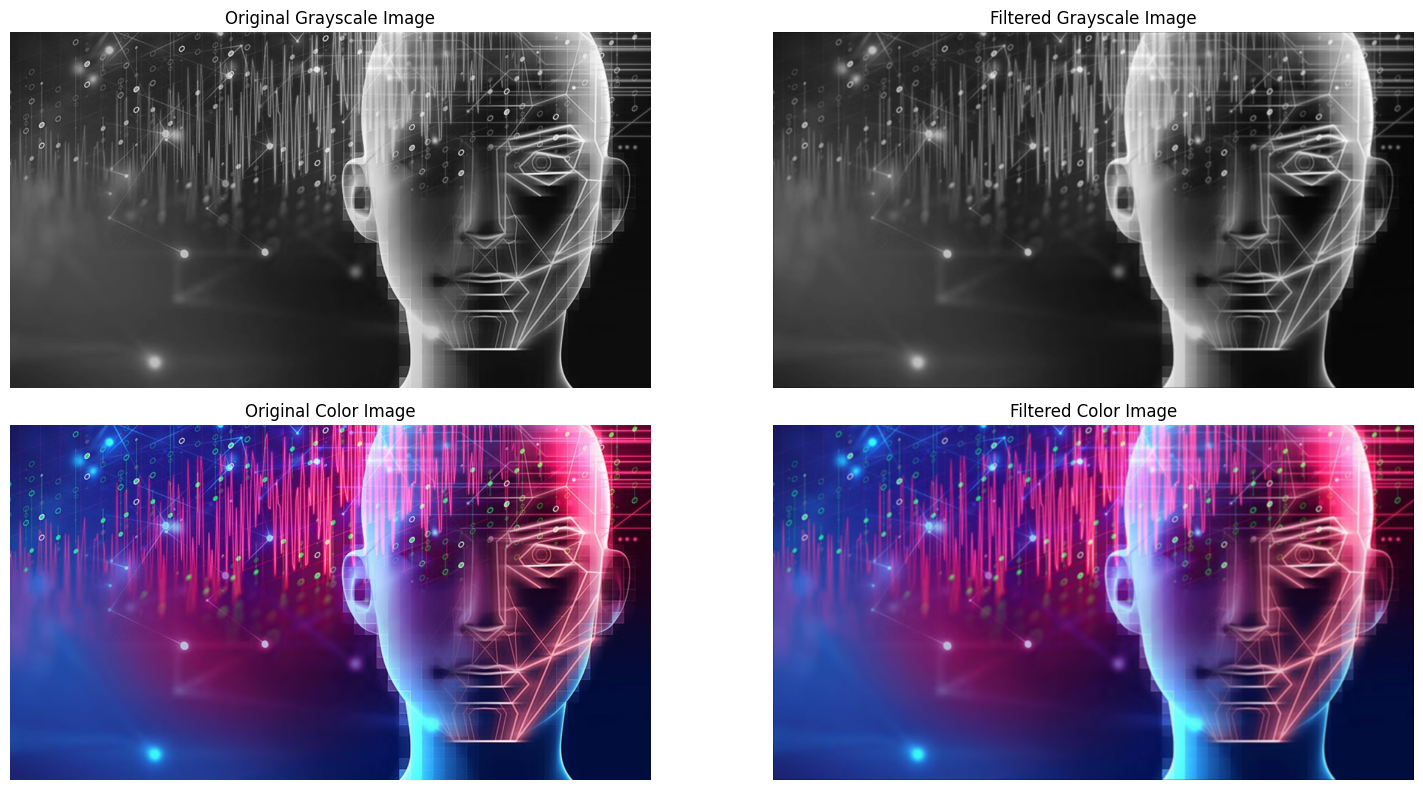

In [21]:
from scipy.signal import convolve2d

# Perform filtering for grayscale image
f1 = np.ones((3, 3)) / 9.0
cf1_gray = convolve2d(cc_gray, f1, mode='same')

# Separate channels for the color image
R = cc[:,:,0]
G = cc[:,:,1]
B = cc[:,:,2]

# Convolve each channel separately
cf1_color_R = convolve2d(R, f1, mode='same')
cf1_color_G = convolve2d(G, f1, mode='same')
cf1_color_B = convolve2d(B, f1, mode='same')

# Stack the filtered channels back into a color image
cf1_color = np.stack([cf1_color_R, cf1_color_G, cf1_color_B], axis=2)

# Display original and filtered images
plt.figure(figsize=(16, 8))

# Original grayscale image
plt.subplot(2, 2, 1)
plt.imshow(cc_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Filtered grayscale image
plt.subplot(2, 2, 2)
plt.imshow(cf1_gray, cmap='gray')
plt.title('Filtered Grayscale Image')
plt.axis('off')

# Original color image
plt.subplot(2, 2, 3)
plt.imshow(cc)
plt.title('Original Color Image')
plt.axis('off')

# Filtered color image
plt.subplot(2, 2, 4)
plt.imshow(cf1_color.astype(np.uint8))
plt.title('Filtered Color Image')
plt.axis('off')

plt.tight_layout()
plt.show()


## 3.2 a

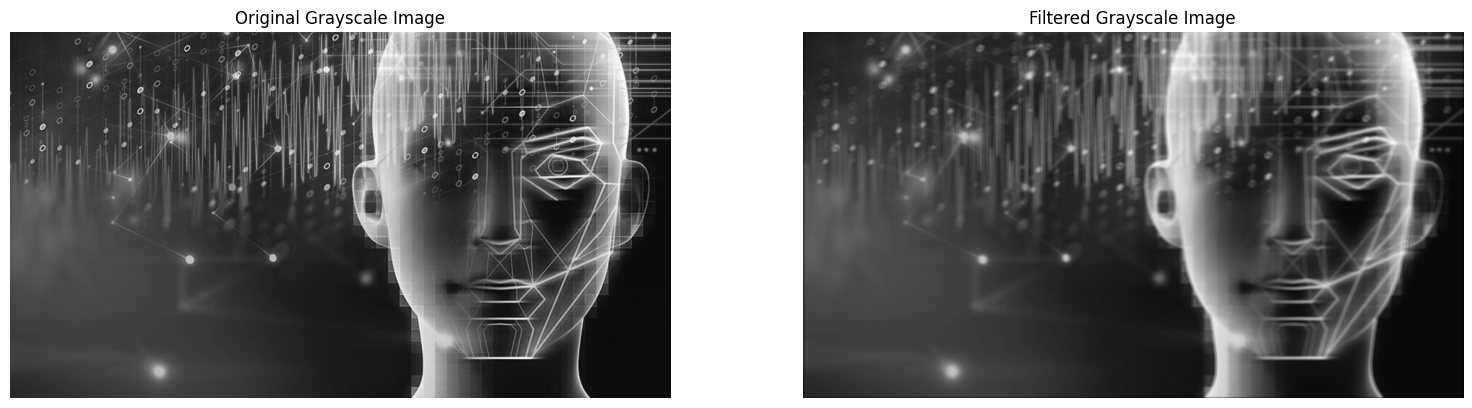

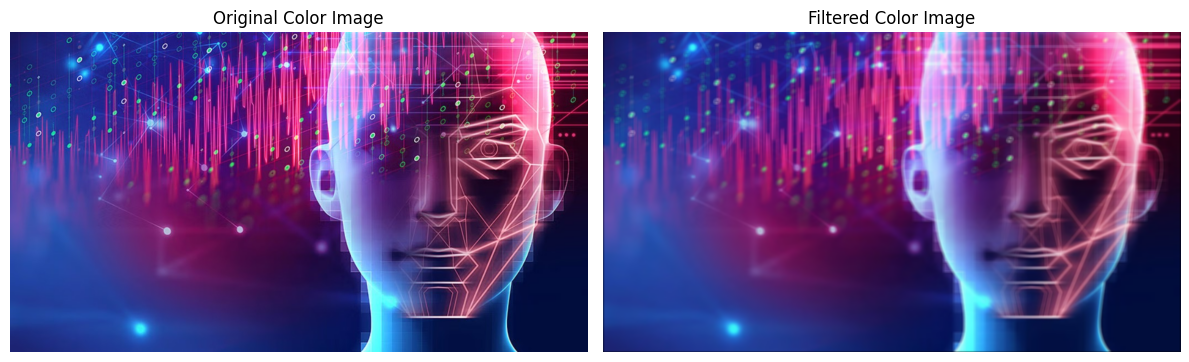

In [29]:
def filter(x, y):

    # Perform filtering for grayscale image
    f1_gray = np.ones((x, y)) / (x * y)
    cf1_gray = convolve2d(cc_gray, f1_gray, mode='same')

    # Perform filtering for color image
    f1_color = np.ones((5, 7)) / (5 * 7)
    cf1_color = np.zeros_like(cc, dtype=float)
    for i in range(3):  # Apply filter to each color channel separately
        cf1_color[:,:,i] = convolve2d(cc[:,:,i], f1_color, mode='same')

    # Display original and filtered images
    plt.figure(figsize=(16, 8))

    # Original grayscale image
    plt.subplot(2, 2, 1)
    plt.imshow(cc_gray, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    # Filtered grayscale image
    plt.subplot(2, 2, 2)
    plt.imshow(cf1_gray, cmap='gray')
    plt.title('Filtered Grayscale Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Display filtered color image
    plt.figure(figsize=(12, 6))

    # Original color image
    plt.subplot(1, 2, 1)
    plt.imshow(cc)
    plt.title('Original Color Image')
    plt.axis('off')

    # Filtered color image
    plt.subplot(1, 2, 2)
    plt.imshow(cf1_color.astype(np.uint8))
    plt.title('Filtered Color Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

filter(5, 7)


## 3.2 b

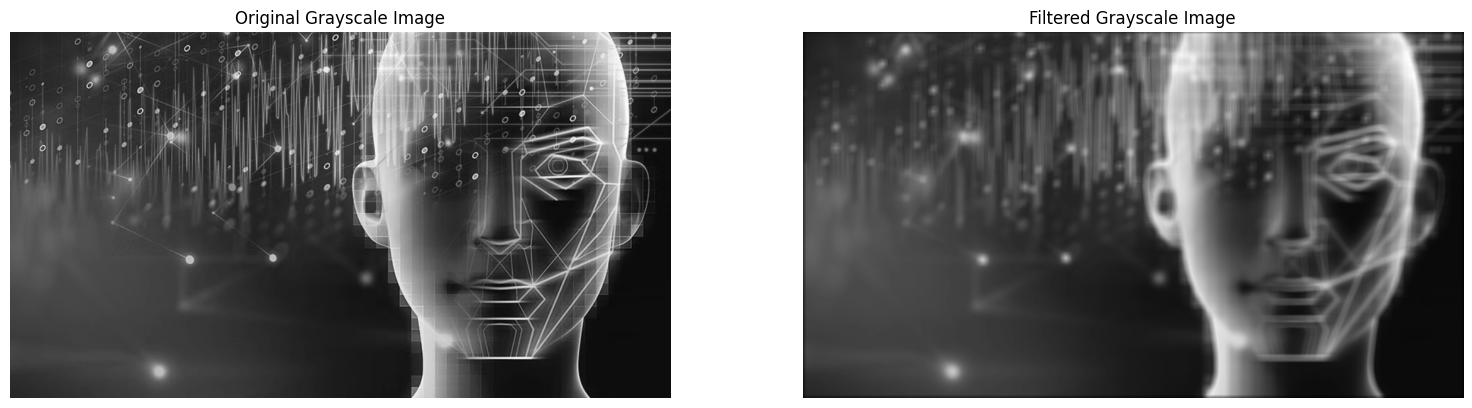

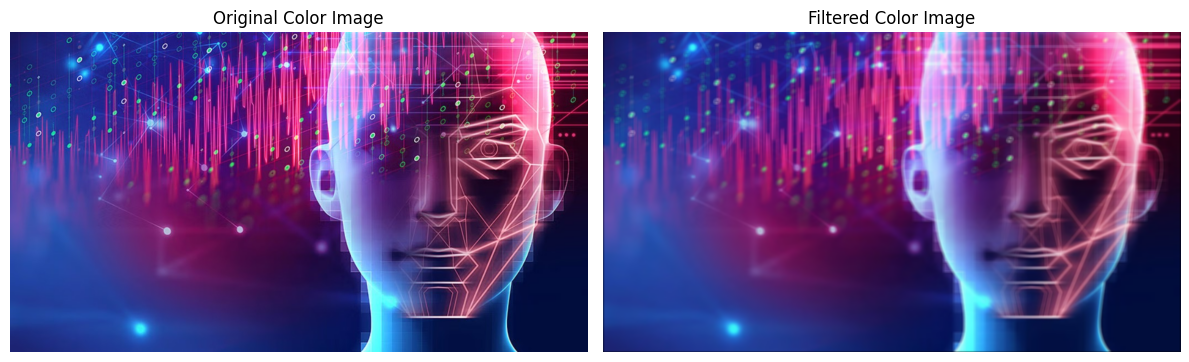

In [30]:
filter(11, 11)

## 3.3

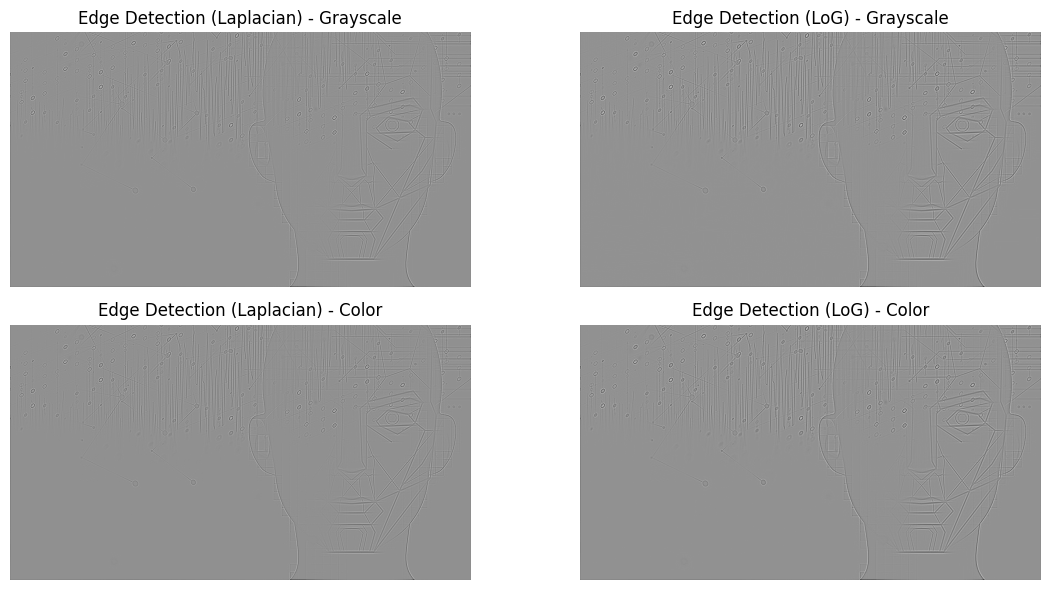

In [31]:
from skimage import color

# Perform edge detection for grayscale image
f_laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
cf2_gray = convolve2d(cc_gray, f_laplacian, mode='same')

# Perform Laplacian of Gaussian for grayscale image
f_log = np.array([[0, 0, 1, 0, 0],
                  [0, 1, 2, 1, 0],
                  [1, 2, -16, 2, 1],
                  [0, 1, 2, 1, 0],
                  [0, 0, 1, 0, 0]])
cf3_gray = convolve2d(cc_gray, f_log, mode='same')

# Convert the color image to grayscale
IG = color.rgb2gray(cc)

# Perform edge detection for color image
cf2_color = convolve2d(IG, f_laplacian, mode='same')

# Perform Laplacian of Gaussian for color image
cf3_color = convolve2d(IG, f_log, mode='same')

# Display edge detection results
plt.figure(figsize=(12, 6))

# Edge detection for grayscale image
plt.subplot(2, 2, 1)
plt.imshow(cf2_gray / 155, cmap='gray')
plt.title('Edge Detection (Laplacian) - Grayscale')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cf3_gray / 155, cmap='gray')
plt.title('Edge Detection (LoG) - Grayscale')
plt.axis('off')

# Edge detection for color image
plt.subplot(2, 2, 3)
plt.imshow(cf2_color / 155, cmap='gray')
plt.title('Edge Detection (Laplacian) - Color')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cf3_color / 155, cmap='gray')
plt.title('Edge Detection (LoG) - Color')
plt.axis('off')

plt.tight_layout()
plt.show()

## 3.4

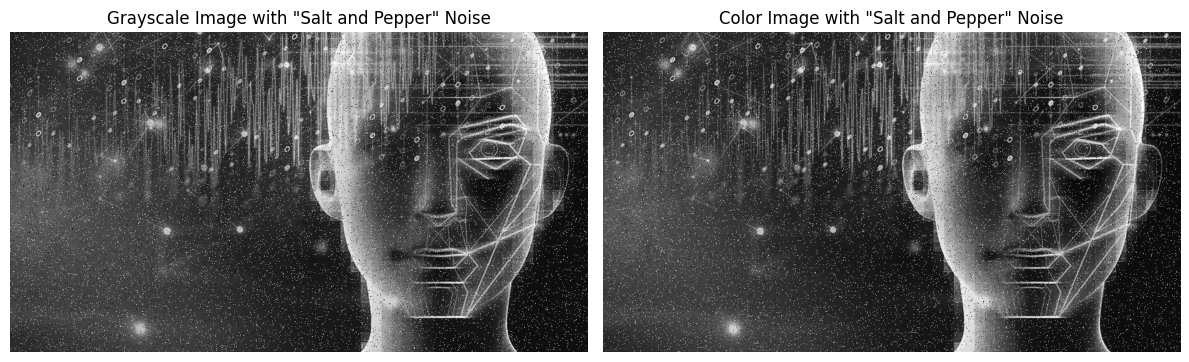

In [32]:
from skimage.util import random_noise

# Add "salt and pepper" noise to grayscale image
c_sp_gray = random_noise(cc_gray, mode='s&p')

# Convert the color image to grayscale
IG = color.rgb2gray(cc)

# Add "salt and pepper" noise to grayscale image
c_sp_color = random_noise(IG, mode='s&p')

# Display images with "salt and pepper" noise
plt.figure(figsize=(12, 6))

# Image with "salt and pepper" noise - grayscale
plt.subplot(1, 2, 1)
plt.imshow(c_sp_gray, cmap='gray')
plt.title('Grayscale Image with "Salt and Pepper" Noise')
plt.axis('off')

# Image with "salt and pepper" noise - color
plt.subplot(1, 2, 2)
plt.imshow(c_sp_color, cmap='gray')
plt.title('Color Image with "Salt and Pepper" Noise')
plt.axis('off')

plt.tight_layout()
plt.show()

## 3.5

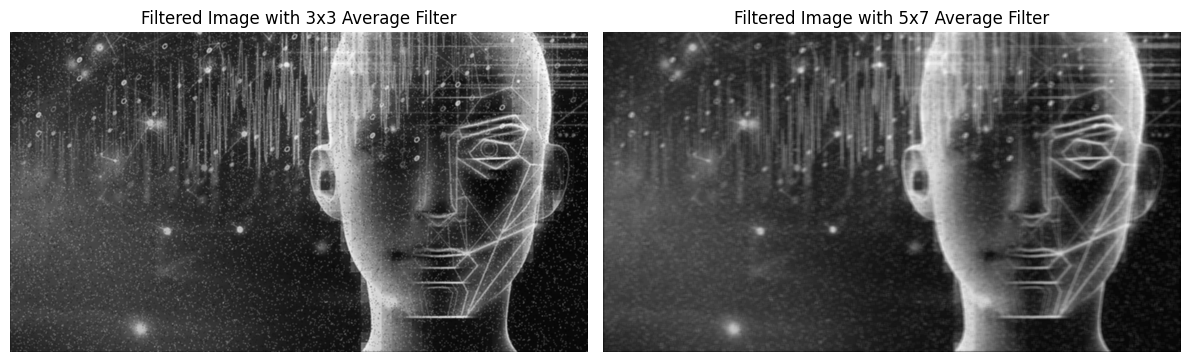

In [34]:
# Add "salt and pepper" noise to grayscale image
c_sp_gray = random_noise(cc_gray, mode='s&p')

# Convert the color image to grayscale
IG = color.rgb2gray(cc)

# Add "salt and pepper" noise to grayscale image
c_sp_color = random_noise(IG, mode='s&p')

# Define 3x3 and 5x7 average filters
a3 = np.ones((3, 3)) / 9
a4 = np.ones((5, 7)) / 35  # Adjusted to maintain sum of 1

# Filter the noisy images with the average filters
c_sp_f3 = convolve2d(c_sp_gray, a3, mode='same')
c_sp_f4 = convolve2d(c_sp_gray, a4, mode='same')

# Display filtered images
plt.figure(figsize=(12, 6))

# Filtered image with 3x3 average filter
plt.subplot(1, 2, 1)
plt.imshow(c_sp_f3 / 255, cmap='gray')
plt.title('Filtered Image with 3x3 Average Filter')
plt.axis('off')

# Filtered image with 5x7 average filter
plt.subplot(1, 2, 2)
plt.imshow(c_sp_f4 / 255, cmap='gray')
plt.title('Filtered Image with 5x7 Average Filter')
plt.axis('off')

plt.tight_layout()
plt.show()